In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, r2_score

## Загрузите набор данных car_price.csv. Необходимо решить задачу регрессии и научиться предсказывать цену подержанного автомобиля (столбец 'current price').

In [52]:
data = pd.read_csv('car_price.csv')
data = data.drop('v.id', axis=1)
data

on road old  on road now  years      km  rating  condition  economy  \
0         535651       798186      3   78945       1          2       14   
1         591911       861056      6  117220       5          9        9   
2         686990       770762      2  132538       2          8       15   
3         573999       722381      4  101065       4          3       11   
4         691388       811335      6   61559       3          9       12   
..           ...          ...    ...     ...     ...        ...      ...   
995       633238       743850      5  125092       1          6       11   
996       599626       848195      4   83370       2          9       14   
997       646344       842733      7   86722       1          8        9   
998       535559       732439      2  140478       4          5        9   
999       590105       779743      5   67295       4          2        8   

     top speed   hp  torque  current price  
0          177   73     123       351318.0  
1          148   74      95       285001.5  
2          181   53      97       215386.0  
3          197   54     116       244295.5  
4          160   53     105       531114.5  
..         ...  ...     ...            ...  
995        171   95      97       190744.0  
996        161  101     120       419748.0  
997        196  113      89       405871.0  
998        184  112     128        74398.0  
999        199   99      96       414938.5  

[1000 rows x 11 columns]

### Предобработка данных

#### Основные данные о датасете

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   on road old    1000 non-null   int64  
 1   on road now    1000 non-null   int64  
 2   years          1000 non-null   int64  
 3   km             1000 non-null   int64  
 4   rating         1000 non-null   int64  
 5   condition      1000 non-null   int64  
 6   economy        1000 non-null   int64  
 7   top speed      1000 non-null   int64  
 8   hp             1000 non-null   int64  
 9   torque         1000 non-null   int64  
 10  current price  1000 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 86.1 KB


In [54]:
data.describe()

on road old  on road now        years             km       rating  \
count    1000.000000    1000.0000  1000.000000    1000.000000  1000.000000   
mean   601648.286000  799131.3970     4.561000  100274.430000     2.988000   
std     58407.246204   57028.9502     1.719079   29150.463233     1.402791   
min    500265.000000  700018.0000     2.000000   50324.000000     1.000000   
25%    548860.500000  750997.7500     3.000000   74367.500000     2.000000   
50%    601568.000000  798168.0000     5.000000  100139.500000     3.000000   
75%    652267.250000  847563.2500     6.000000  125048.000000     4.000000   
max    699859.000000  899797.0000     7.000000  149902.000000     5.000000   

         condition      economy   top speed          hp       torque  \
count  1000.000000  1000.000000  1000.00000  1000.00000  1000.000000   
mean      5.592000    11.625000   166.89300    84.54600   103.423000   
std       2.824449     2.230549    19.28838    20.51694    21.058716   
min       1.000000     8.000000   135.00000    50.00000    68.000000   
25%       3.000000    10.000000   150.00000    67.00000    85.000000   
50%       6.000000    12.000000   166.00000    84.00000   104.000000   
75%       8.000000    13.000000   184.00000   102.00000   121.000000   
max      10.000000    15.000000   200.00000   120.00000   140.000000   

       current price  
count     1000.00000  
mean    308520.24250  
std     126073.25915  
min      28226.50000  
25%     206871.75000  
50%     306717.75000  
75%     414260.87500  
max     584267.50000

#### Обработка пропущенных значений

In [55]:
data.isnull().sum()

on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

Нет пропущенных значений

#### Обработка выбросов

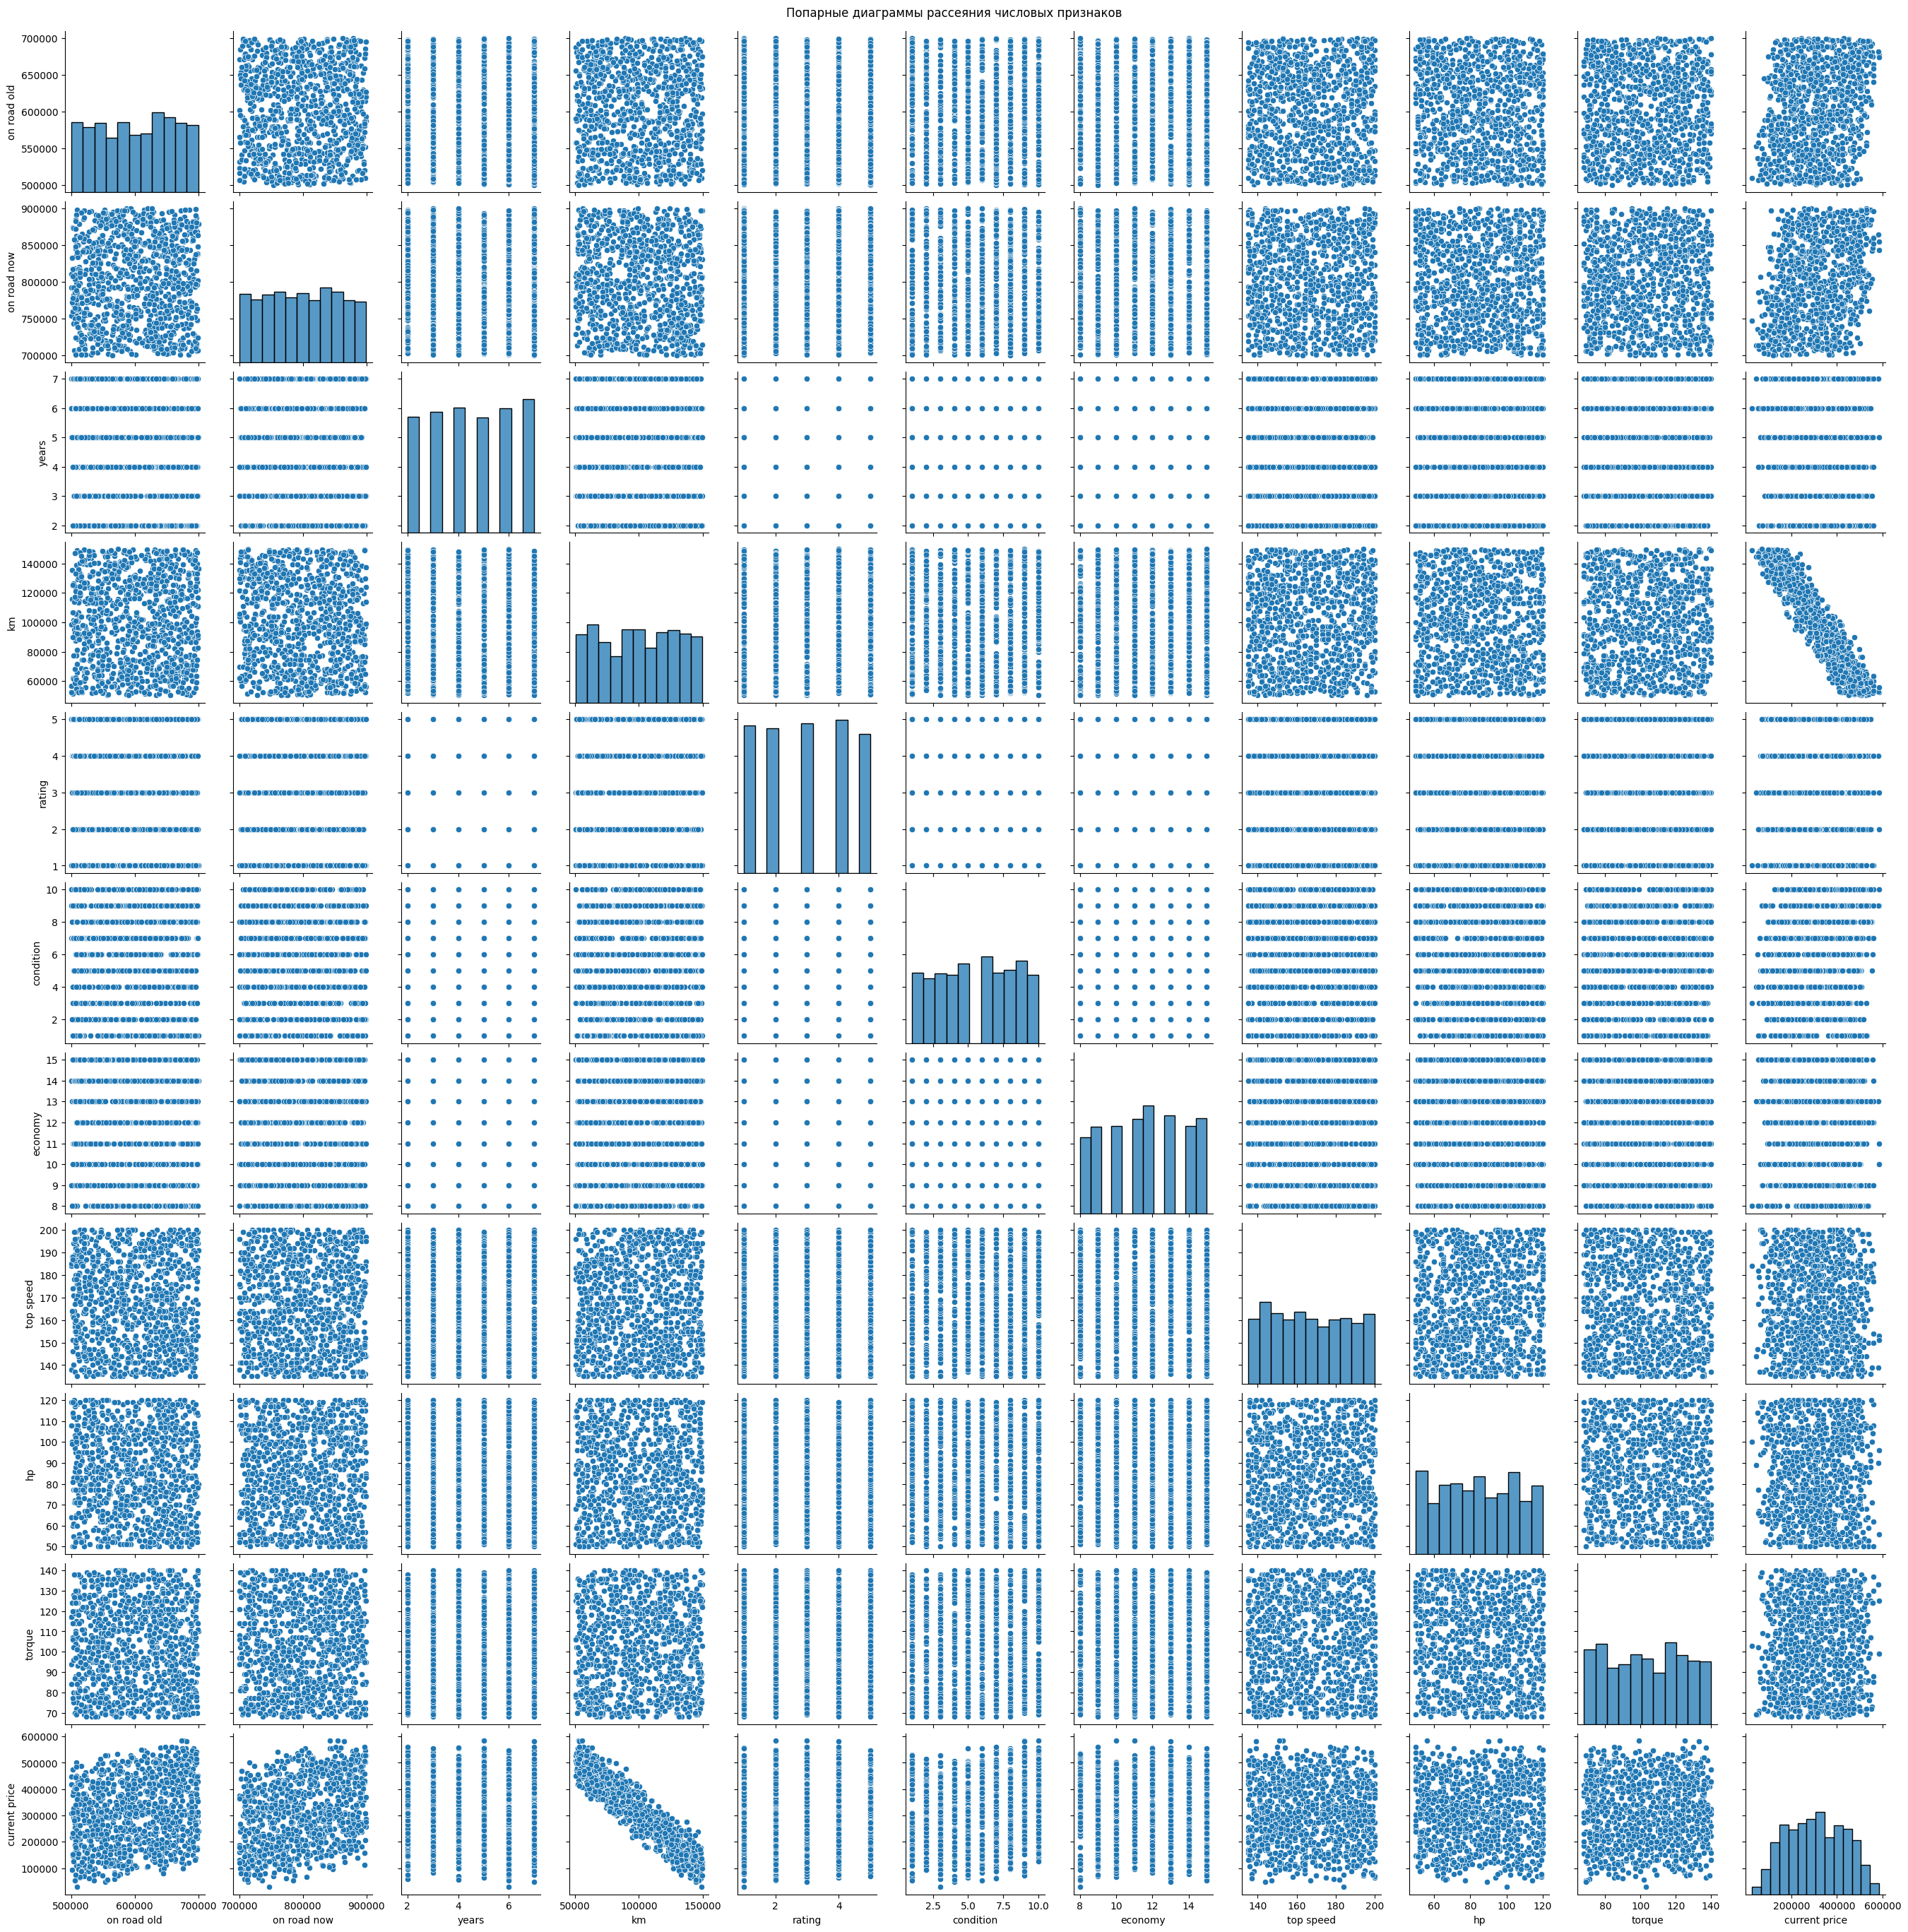

In [56]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(data[numeric_cols])
plt.suptitle("Попарные диаграммы рассеяния числовых признаков", y=1)
plt.show()

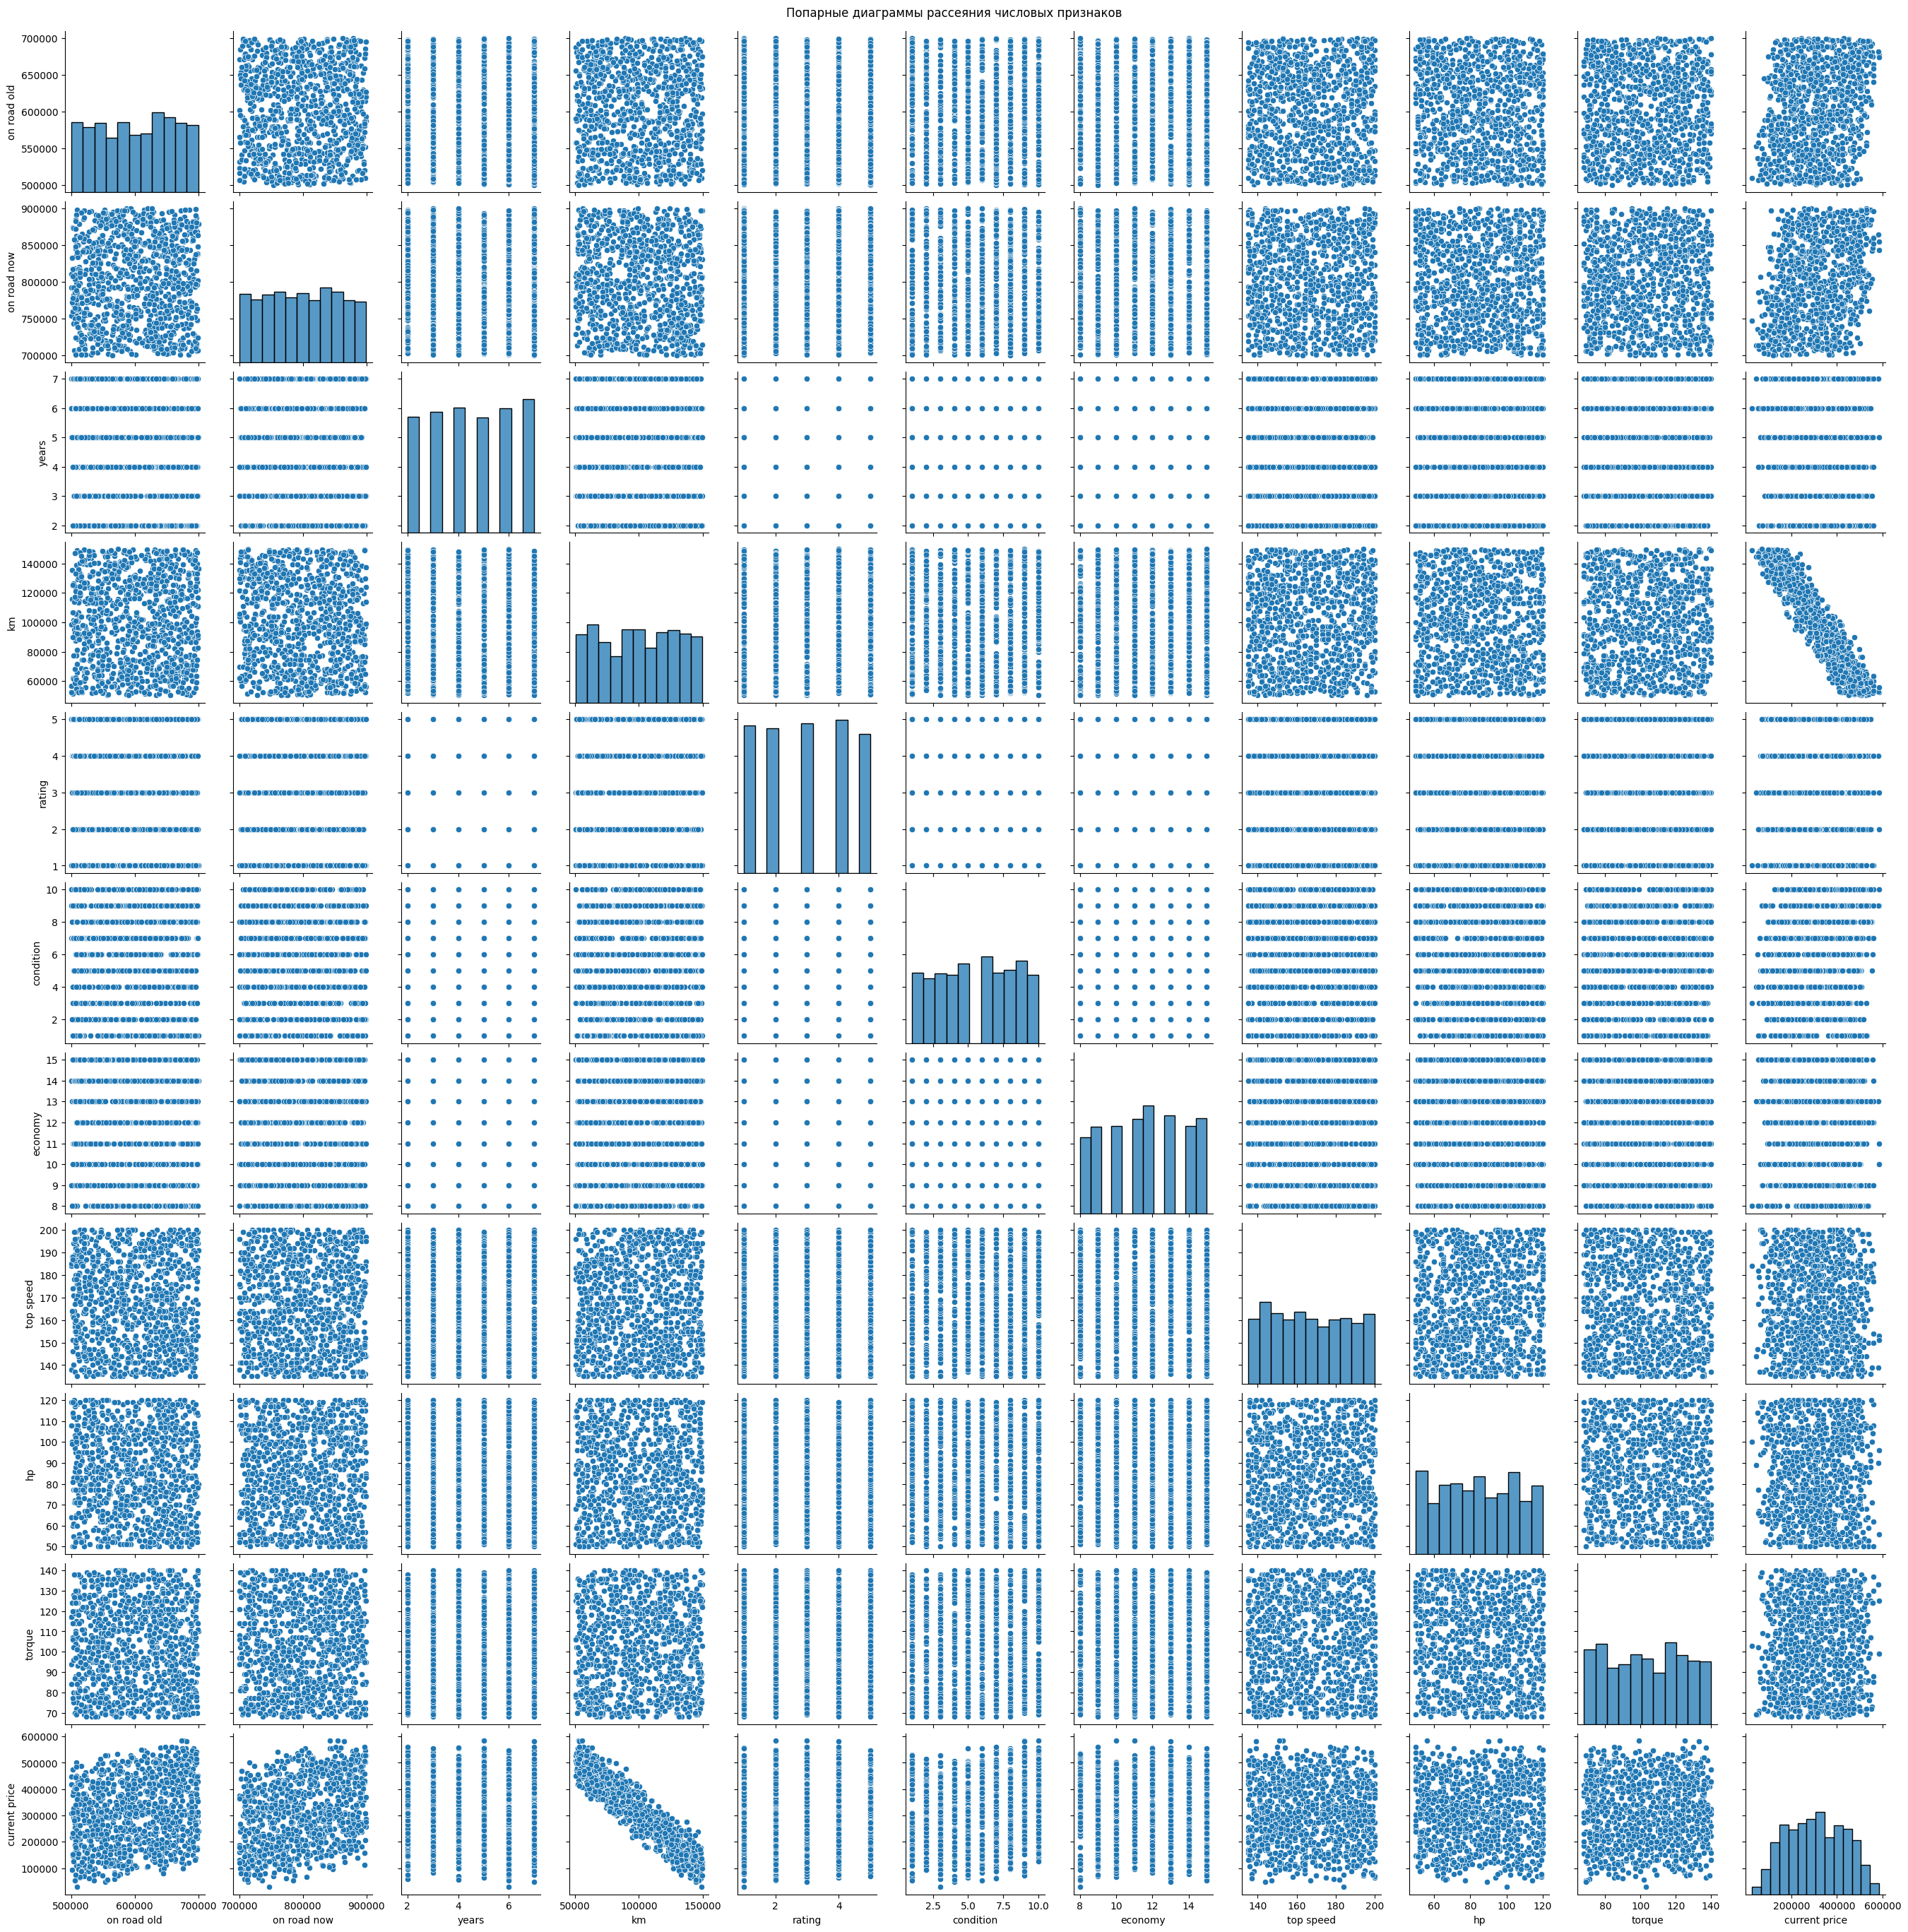

In [57]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data = remove_outliers_iqr(data, 'on road old')
data = remove_outliers_iqr(data, 'on road now')
data = remove_outliers_iqr(data, 'years')
data = remove_outliers_iqr(data, 'km')
data = remove_outliers_iqr(data, 'rating')
data = remove_outliers_iqr(data, 'condition')
data = remove_outliers_iqr(data, 'economy')
data = remove_outliers_iqr(data, 'top speed')
data = remove_outliers_iqr(data, 'hp')
data = remove_outliers_iqr(data, 'torque')
data = remove_outliers_iqr(data, 'current price')

sns.pairplot(data[numeric_cols])
plt.suptitle("Попарные диаграммы рассеяния числовых признаков", y=1)
plt.show()

### Отбор признаков, разделение на выборки

In [58]:
X = data.drop('current price', axis=1)
y = data['current price']

In [59]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(800, 200)

### Линейная регресиия

In [61]:
estimator = LinearRegression()
rfecv = RFECV(estimator=estimator, step=1, cv=5, scoring='neg_mean_squared_error') # cv=5 для 5-кратной кросс-валидации
rfecv.fit(X_train, y_train)

RFECV(cv=5, estimator=LinearRegression(), scoring='neg_mean_squared_error')

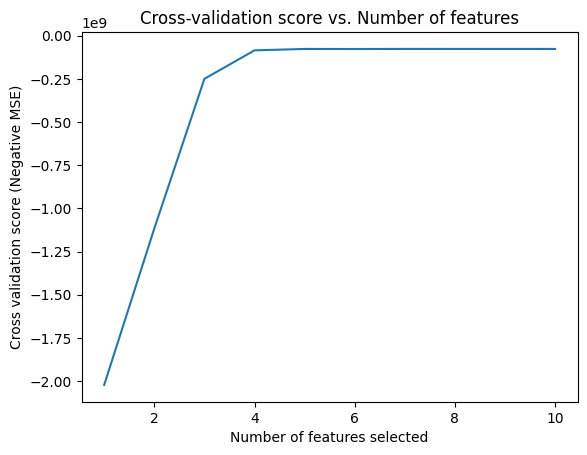

In [68]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (Negative MSE)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title("Cross-validation score vs. Number of features")
plt.show()

In [62]:
best_features = list(X.columns[rfecv.support_])
print("Лучшие признаки:", best_features)

Лучшие признаки: ['on road old', 'on road now', 'years', 'km', 'condition', 'top speed', 'hp']


In [63]:
X_train_selected = X_train[:, rfecv.support_]
X_test_selected = X_test[:, rfecv.support_]

model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [64]:
y_train_predict = model.predict(X_train_selected)
y_test_predict  = model.predict(X_test_selected)

In [65]:
MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(74617067.2828786, 81040133.95805357, 0.9952299034881577, 0.9951793311169085)

In [66]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(8638.117114445635, 9002.229388215654)

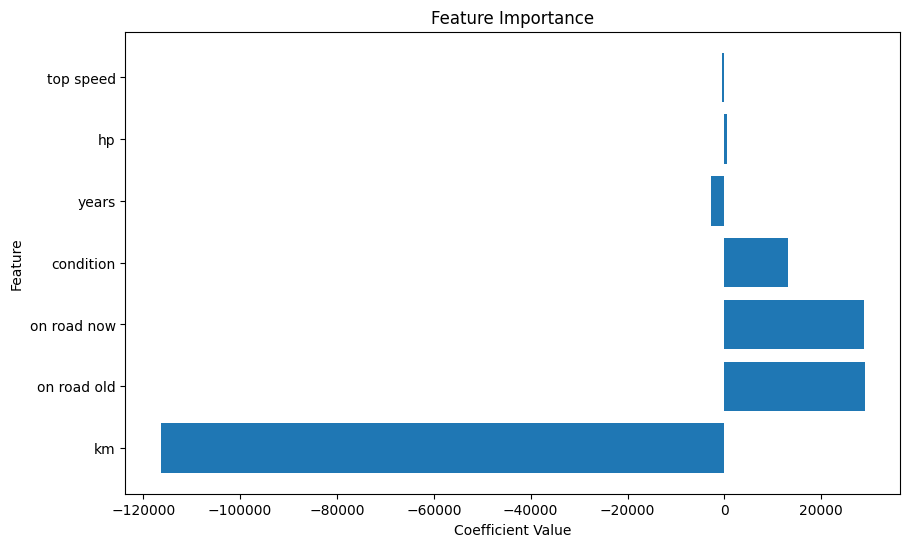

In [67]:
coefficients = model.coef_

sorted_idx = np.argsort(np.abs(coefficients))[::-1]
sorted_features = [best_features[i] for i in sorted_idx] 
sorted_coefficients = coefficients[sorted_idx] 

# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients) 
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Lasso